In [17]:
%matplotlib inline

In [18]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os

In [19]:
apf_file = fits.open('rahj.205.fits')

In [20]:
image = apf_file[0].data

Text(0.5, 1.0, '2D array data')

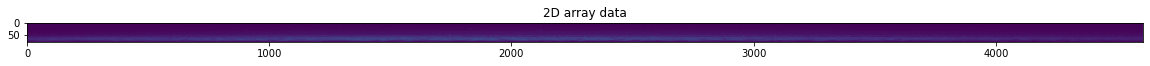

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.title('2D array data')

Text(0.5, 1.0, '2D array data w/ contrast')

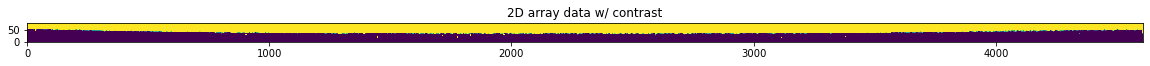

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('2D array data w/ contrast')

Text(0.5, 1.0, '2D array w/ contrast and flipped')

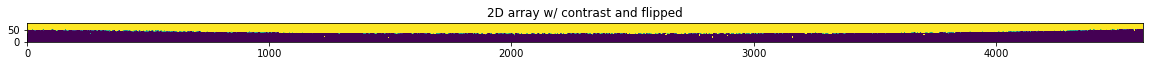

In [23]:
image_flip = np.fliplr(image)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and flipped')

Text(0.5, 1.0, 'Final 2D array (Our Spectrum!)')

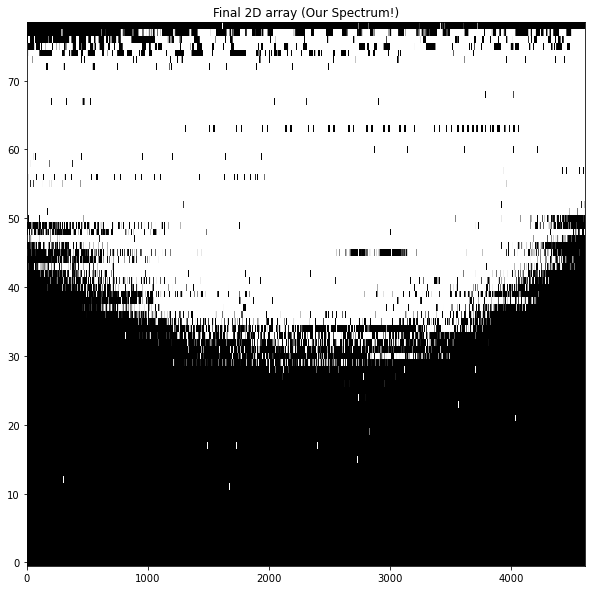

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(image_flip, cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
    vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('Final 2D array (Our Spectrum!)')

Text(0.5, 1.0, 'small patch [45:46, 1522:1795] of telluric lines')

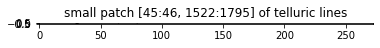

In [25]:
patch = image_flip[45:46, 1522:1795]
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [45:46, 1522:1795] of telluric lines')

Text(0.5, 1.0, 'small patch [45:46, 1522:1795] of telluric lines')

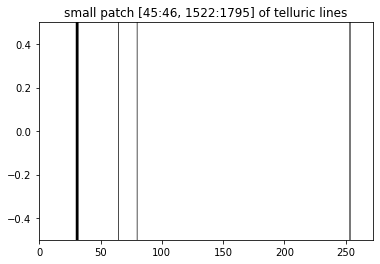

In [26]:
plt.imshow(image_flip[45:46, 1522:1795], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [45:46, 1522:1795] of telluric lines')

In [27]:
patch = image_flip[45:46, 1522:1795]
patch.size

273

In [28]:
telluric_1D = np.sum(patch, axis = 0)

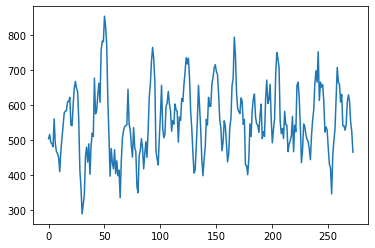

In [29]:
plt.plot(telluric_1D)

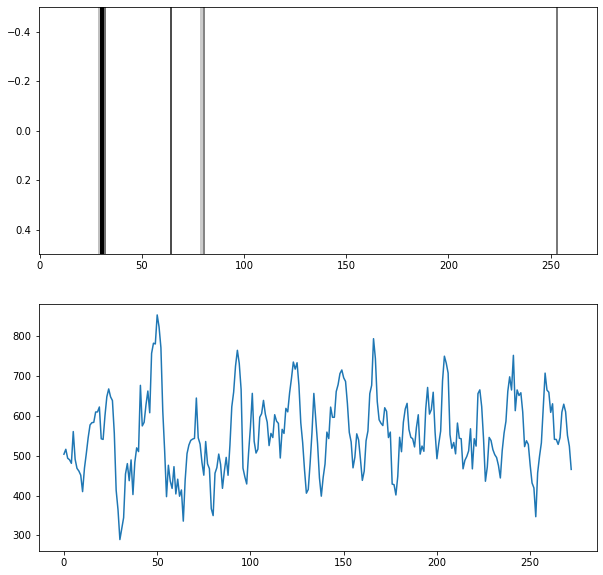

In [30]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[45:46,1522:1795], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [31]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [32]:
bias = np.median(image_flip[-30:])
print(bias)

1426.4102


In [33]:
#cutting out the patch with the absorption feature
sodium_patch = image_flip[45:46,1522:1795] 
#take the sum along the columns, and subtract 15 biases
sodium_patch_1D_without_bias = np.sum(sodium_patch, axis = 0) - bias*0.2

Text(0.5, 1.0, 'Sodium')

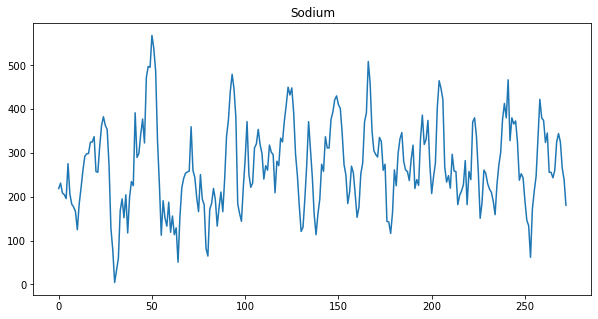

In [34]:
plt.figure(figsize=(10,5))
plt.plot(np.sum(sodium_patch, axis = 0) - bias*0.2)
plt.title('Sodium')

Text(0.5, 1.0, 'small patch [34:35, 1350:2206] of telluric lines')

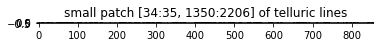

In [35]:
patch = image_flip[34:35, 1350:2206]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [34:35, 1350:2206] of telluric lines')

Text(0.5, 1.0, 'small patch [34:35, 1350:2206] of telluric lines')

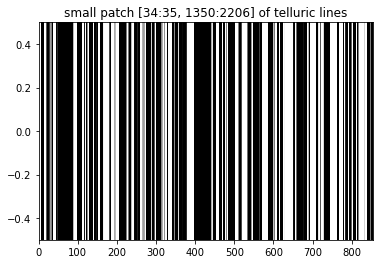

In [36]:
plt.imshow(image_flip[34:35, 1350:2206], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [34:35, 1350:2206] of telluric lines')

In [37]:
patch = image_flip[34:35, 1350:2206]
patch.size

856

In [38]:
telluric_1D2 = np.sum(patch, axis = 0)

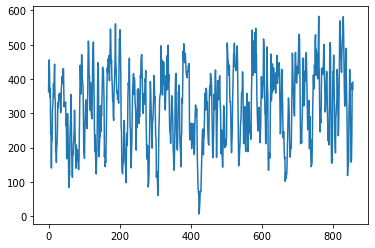

In [39]:
plt.plot(telluric_1D2)

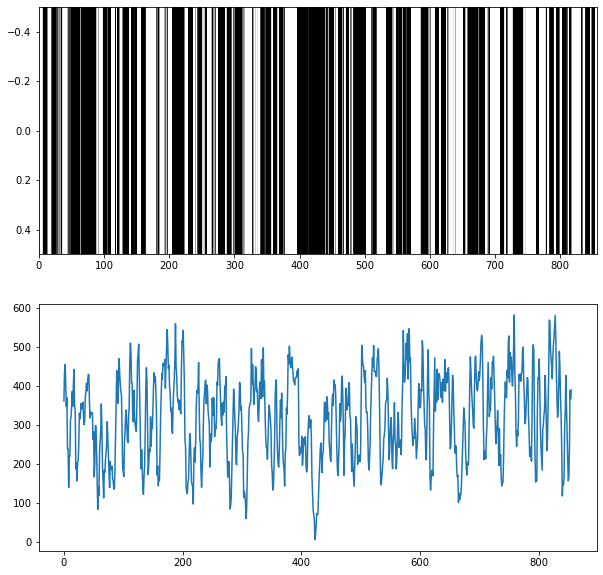

In [40]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[34:35,1350:2206], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D2)

In [41]:
bias = np.median(image_flip[-30:])
print(bias)

1426.4102


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [34:35, 1350:2206]')

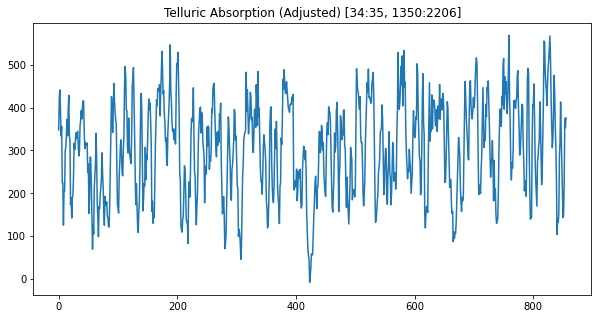

In [48]:
plt.figure(figsize=(10,5))
telluric_1D2_adj = telluric_1D2 - (0.01*bias)
plt.plot(telluric_1D2_adj)
plt.title('Telluric Absorption (Adjusted) [34:35, 1350:2206]')

In [43]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [44]:
#cutting out the patch with the absorption feature
magnesium_patch = image_flip[34:35,1350:2206] 
#take the sum along the columns, and subtract 15 biases
magnesium_patch_1D_without_bias = np.sum(magnesium_patch, axis = 0) - bias*0.15

Text(0.5, 1.0, 'Magnesium')

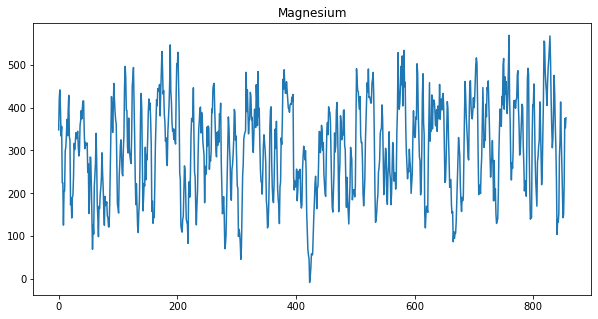

In [50]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,5))
plt.plot(np.sum(magnesium_patch, axis = 0) - bias*0.01)
plt.title('Magnesium')